In [2]:
import pandas as pd
import os
import seaborn as sns

In [3]:
dir_cnr1 = "CNR1/pharmacophore_search/"
dir_cnr2 = "CNR2/pharmacophore_search/"
df_cnr1 = []
df_cnr2 = []
for dirs, subdirs, files in os.walk(dir_cnr1):
    for file in files:
        if ".smi" in file:
            df = pd.read_csv(dir_cnr1 + file, sep='\t', names=["smiles", "id"])
            new_column = {'receptor': [file.split(sep="_")[0] for i in range(0,len(df['smiles']))]}
            df = df.assign(**new_column)
            df_cnr1.append(df)
            
for dirs, subdirs, files in os.walk(dir_cnr2):
    for file in files:
        if ".smi" in file:
            df = pd.read_csv(dir_cnr2 + file, sep='\t', names=["smiles", "id"])
            new_column = {'receptor': [file.split(sep="_")[0] for i in range(0,len(df['smiles']))]}
            df = df.assign(**new_column)
            df_cnr2.append(df)

In [4]:
data_1 = pd.concat(df_cnr1, ignore_index=True)
data_2 = pd.concat(df_cnr2, ignore_index=True)

In [5]:
data_1.drop_duplicates(inplace=True, subset='id')

In [6]:
data_2.drop_duplicates(inplace=True, subset='id')

In [7]:
data_1.describe()

,smiles,id,receptor
count,316,316,316
unique,314,316,6
top,Cc1c(C(=O)N[C@@H]2CCCC[C@H]2O)nc(c2c(cc(cc2)Cl...,CHEMBL4463214_5XRA,5tgz
freq,2,1,163


In [8]:
data_1[data_1['smiles'].duplicated()].iloc[0]['smiles']

'Cc1c(C(=O)N[C@@H]2CCCC[C@H]2O)nc(c2c(cc(cc2)Cl)Cl)n1c1ccc(cc1)OS(=O)(=O)CCC(F)(F)F'

In [9]:
data_1[data_1['smiles'].duplicated()].iloc[1]['smiles']

'CCOC(=O)N1CCC[C@H](C1)NC(=O)c1c(c(c2ccc(cc2)Cl)n(c2ccc(cc2Cl)Cl)n1)C'

In [10]:
data_2.describe()

,smiles,id,receptor
count,802,802,802
unique,791,802,7
top,c1(cnc2c(c1)cc(c(=O)n2Cc1ccc(cc1)F)C(=O)N[C@@H...,CHEMBL4783221_5ZTY,6pt0
freq,3,1,404


In [38]:
data_1['id'] = data_1['id'].str.split('_').str[0]
data_2['id'] = data_2['id'].str.split('_').str[0]

Text(0.5, 1.0, 'CNR1')

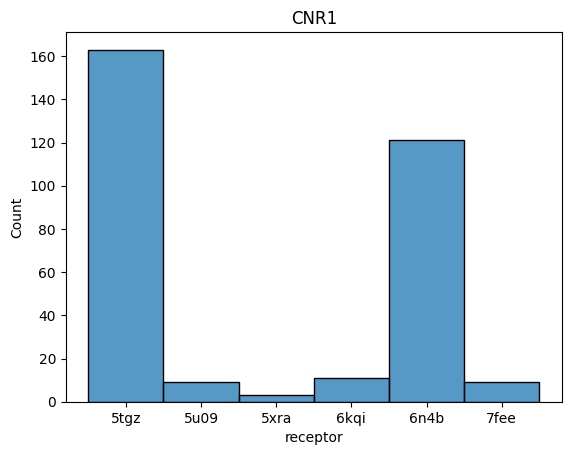

In [39]:
sns.histplot(data_1['receptor']).set_title("CNR1")

Text(0.5, 1.0, 'CNR2')

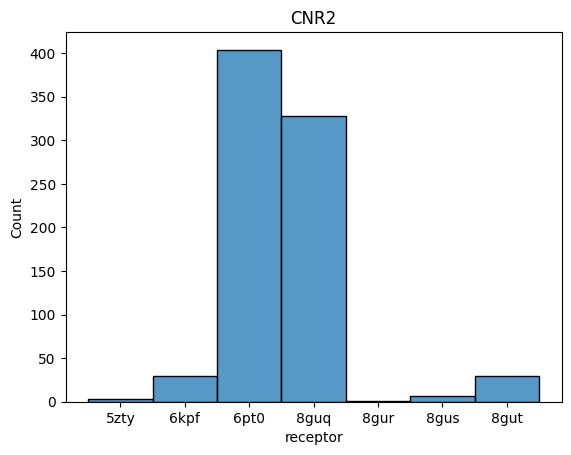

In [40]:
sns.histplot(data_2['receptor']).set_title("CNR2")

In [58]:
def write_output(data: pd.DataFrame, rec_type: str):
    uniq = data['receptor'].unique()
    for receptor in uniq:
        selected_df = data[data['receptor'] == receptor]
        selected_df.iloc[::, 0:2].to_csv(f'{receptor}_pharmacophore_{rec_type}.smi', sep='\t', index=False, header=False)

In [65]:
write_output(data_1, "cnr1")

In [66]:
write_output(data_2, "cnr2")